# Import

## Imports des librairies

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

## Imports des données

In [2]:
df = pd.read_csv("ds_salaries.csv")

In [3]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [4]:
df_pays = pd.read_csv('pays.csv')
df_monnaie = pd.read_csv('codes_salaires.csv')
df_monnaie=df_monnaie.drop(['Entity','NumericCode','MinorUnit','WithdrawalDate'],axis=1)

In [5]:
df = df.merge(df_pays, how='inner', left_on='company_location', right_on='Code').drop(['Code','company_location'], axis=1).rename(columns={'Name': 'Company_location'})
df = df.merge(df_pays, how='inner', left_on='employee_residence', right_on='Code').drop(['Code','employee_residence'], axis=1).rename(columns={'Name': 'employee_residence'})
df = df.drop(['salary','salary_currency'], axis=1)

In [12]:
mapping_dict = {'FT': 'full time', 'PT': 'part time', 'CT': 'Contract', 'FL': 'Freelance'}
df['employment_type'] = df['employment_type'].replace(mapping_dict)

mapping_dict = {'EN': 'Junior', 'MI': 'Intermediate', 'SE': 'Expert', 'EX': 'Director'}
df['experience_level'] = df['experience_level'].replace(mapping_dict)

In [13]:
df.head(5)

,ID,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,Company_location,employee_residence
0,0,2020,Intermediate,full time,Data Scientist,79833,0,L,Germany,Germany
1,30,2020,Intermediate,full time,Data Engineering Manager,59303,100,S,Germany,Germany
2,45,2020,Junior,part time,ML Engineer,15966,100,S,Germany,Germany
3,55,2020,Expert,full time,Principal Data Scientist,148261,100,M,Germany,Germany
4,65,2020,Junior,full time,Data Scientist,62726,50,S,Germany,Germany


# EDA Tristan

# EDA Camille

In [6]:
# dimension of dataset
df.shape

(607, 10)

In [7]:
# statistics summary
df.describe()

,Unnamed: 0,work_year,salary_in_usd,remote_ratio
count,607.000000,607.000000,607.000000,607.00000
mean,303.000000,2021.405272,112297.869852,70.92257
std,175.370085,0.692133,70957.259411,40.70913
min,0.000000,2020.000000,2859.000000,0.00000
25%,151.500000,2021.000000,62726.000000,50.00000
50%,303.000000,2022.000000,101570.000000,100.00000
75%,454.500000,2022.000000,150000.000000,100.00000
max,606.000000,2022.000000,600000.000000,100.00000


In [8]:
# features informations
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary_in_usd       607 non-null    int64 
 6   remote_ratio        607 non-null    int64 
 7   company_size        607 non-null    object
 8   Company_location    607 non-null    object
 9   employee_residence  607 non-null    object
dtypes: int64(4), object(6)
memory usage: 52.2+ KB


In [14]:
# feature Unnamed rename ID
df.rename(columns={'Unnamed: 0': 'ID',}, inplace=True)

In [16]:
#Dataframe numerics
df_num = df[["ID","work_year","salary_in_usd","remote_ratio"]]
df_num

,ID,work_year,salary_in_usd,remote_ratio
0,0,2020,79833,0
1,30,2020,59303,100
2,45,2020,15966,100
3,55,2020,148261,100
4,65,2020,62726,50
...,...,...,...,...
602,501,2022,32974,100
603,503,2022,87425,100
604,505,2022,86703,50
605,510,2022,150000,100


In [18]:
df.head()

,ID,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,Company_location,employee_residence
0,0,2020,Intermediate,full time,Data Scientist,79833,0,L,Germany,Germany
1,30,2020,Intermediate,full time,Data Engineering Manager,59303,100,S,Germany,Germany
2,45,2020,Junior,part time,ML Engineer,15966,100,S,Germany,Germany
3,55,2020,Expert,full time,Principal Data Scientist,148261,100,M,Germany,Germany
4,65,2020,Junior,full time,Data Scientist,62726,50,S,Germany,Germany


In [21]:
#Dataframe categories
df_categories = df[["experience_level","employment_type","job_title","Company_location", "company_size"]]
df_categories

,experience_level,employment_type,job_title,Company_location,company_size
0,Intermediate,full time,Data Scientist,Germany,L
1,Intermediate,full time,Data Engineering Manager,Germany,S
2,Junior,part time,ML Engineer,Germany,S
3,Expert,full time,Principal Data Scientist,Germany,M
4,Junior,full time,Data Scientist,Germany,S
...,...,...,...,...,...
602,Intermediate,full time,Head of Data,Estonia,S
603,Intermediate,full time,Machine Learning Engineer,Australia,L
604,Junior,full time,Data Scientist,Australia,M
605,Junior,full time,Computer Vision Software Engineer,Australia,S


In [ ]:
df.head(5)

In [ ]:
# Correlation graph for our dataset
# As on the previous graph, we observe a strong positive correlation in the center linked to the same features
# Moreover the features median_income and median_house_value are also positively correlated

corr_df = df_num.corr(method='pearson')

#plt.matshow(corr_df)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True,cmap=plt.cm.Blues)
plt.show()

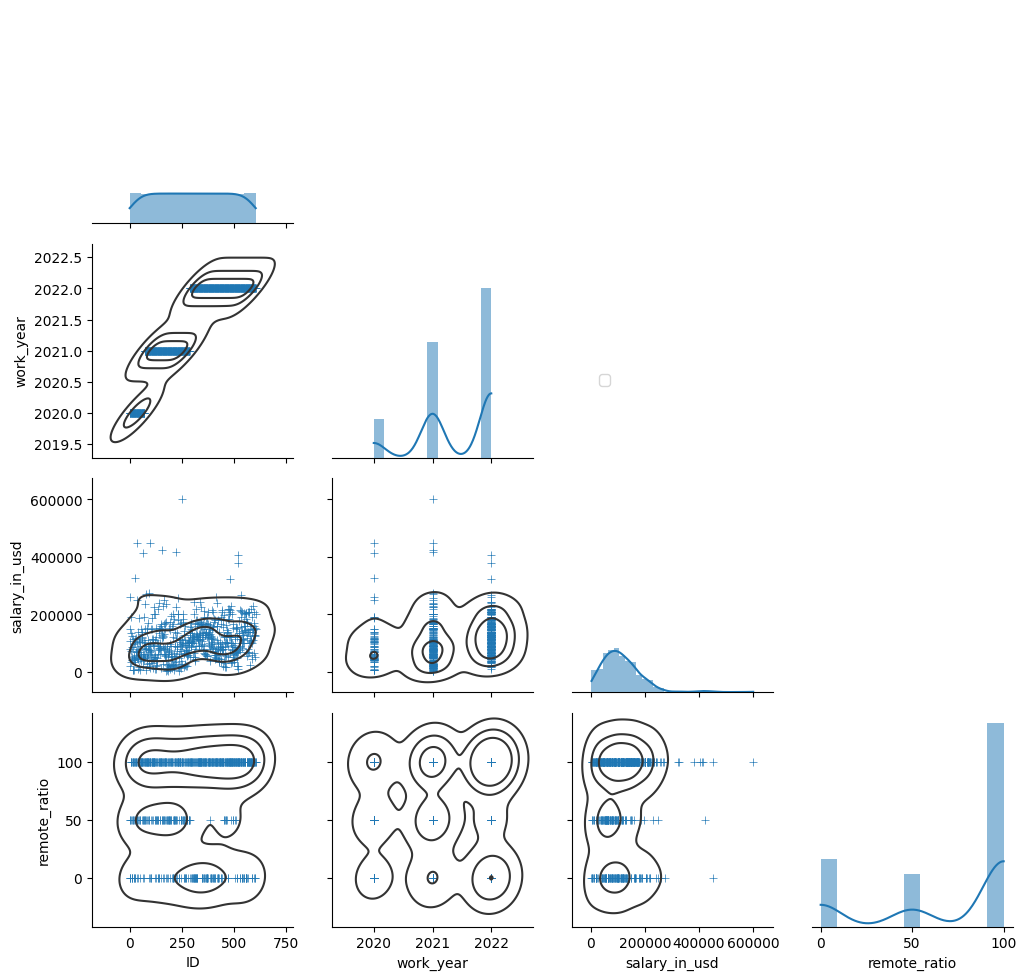

In [23]:
# PairGrid
graph1 = sns.PairGrid(data = df_num,corner = True)
graph1.map_lower(sns.kdeplot, hue = None, levels = 4, color = ".2")
graph1.map_lower(sns.scatterplot, marker = "+")
graph1.map_diag(sns.histplot, element = 'step', linewidth=0,kde=True)
graph1.add_legend(frameon=True)
graph1.legend.set_bbox_to_anchor((.61,.6))

<AxesSubplot:xlabel='job_title', ylabel='remote_ratio'>

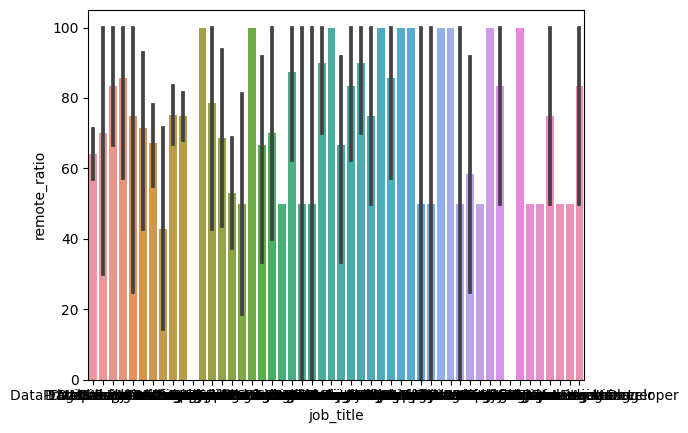

In [28]:
sns.barplot(data=df, x="job_title", y="remote_ratio")

<AxesSubplot:xlabel='salary_in_usd', ylabel='job_title'>

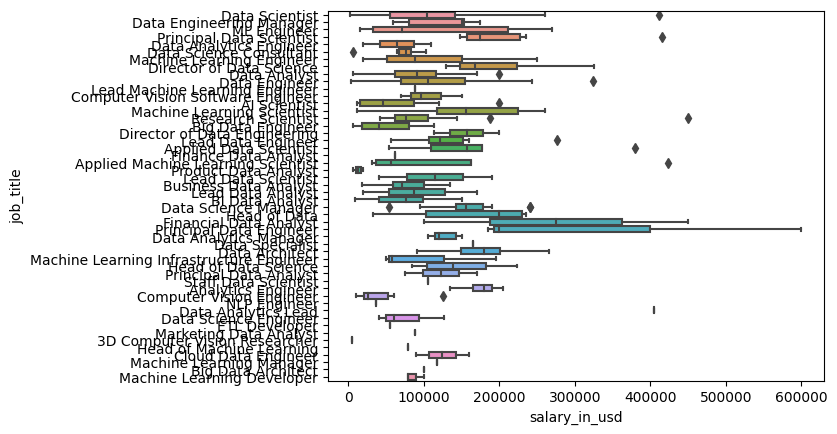

In [29]:
sns.boxplot(data=df, x="salary_in_usd", y="job_title")

In [25]:
job_x = df["job_title"].value_counts()
sorted_job = sorted(job_x, reverse= True)
top_5_job = sorted_job[:5]
job_name = ["Data Scientist", "Data Engineer", "Data Analyst", "Machine Learning Engineer", "Research Scientist"]
colors = sns.color_palette("hls", 8)

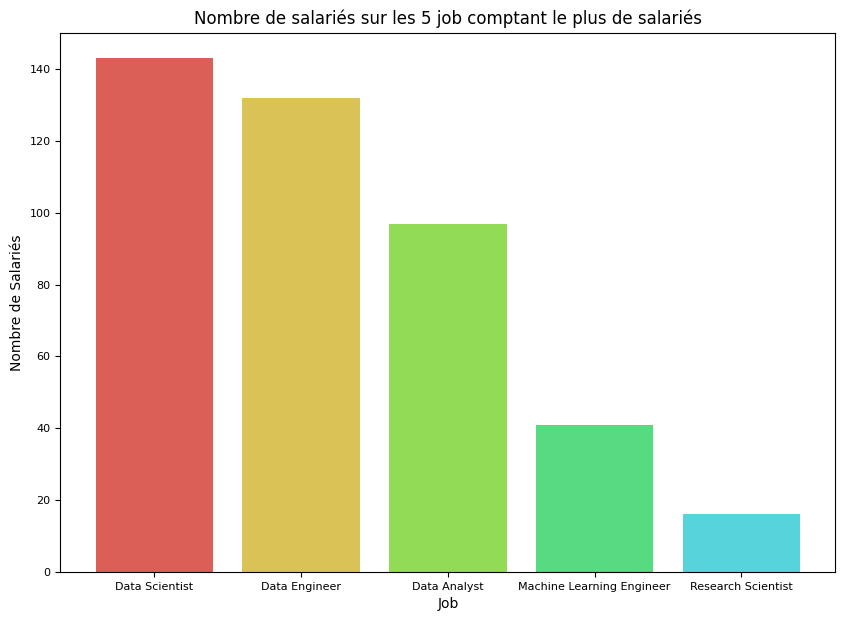

In [35]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(job_name, top_5_job, color = colors)

ax.set_title("Nombre de salariés sur les 5 job comptant le plus de salariés")
ax.set_ylabel("Nombre de Salariés")
ax.set_xlabel("Job")
plt.tick_params(axis = 'both', labelsize = 8)

plt.show()

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

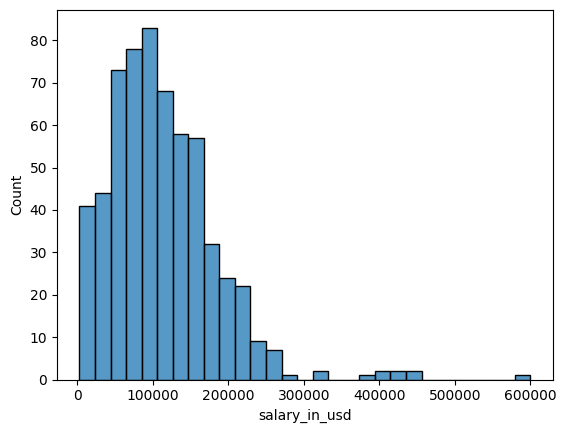

In [27]:
# graph3 on median_value

sns.histplot(data=df, x="salary_in_usd")

In [32]:
df

,ID,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,Company_location,employee_residence
0,0,2020,Intermediate,full time,Data Scientist,79833,0,L,Germany,Germany
1,30,2020,Intermediate,full time,Data Engineering Manager,59303,100,S,Germany,Germany
2,45,2020,Junior,part time,ML Engineer,15966,100,S,Germany,Germany
3,55,2020,Expert,full time,Principal Data Scientist,148261,100,M,Germany,Germany
4,65,2020,Junior,full time,Data Scientist,62726,50,S,Germany,Germany
...,...,...,...,...,...,...,...,...,...,...
602,501,2022,Intermediate,full time,Head of Data,32974,100,S,Estonia,Estonia
603,503,2022,Intermediate,full time,Machine Learning Engineer,87425,100,L,Australia,Australia
604,505,2022,Junior,full time,Data Scientist,86703,50,M,Australia,Australia
605,510,2022,Junior,full time,Computer Vision Software Engineer,150000,100,S,Australia,Australia


In [46]:
job_tite = df.loc[(df['job_title']=="Data Scientist")|(df['job_title']== "Data Engineer")|(df['job_title']=="Data Analyst")|(df['job_title']=="Machine Learning Engineer")|(df['job_title']== "Research Scientist")]

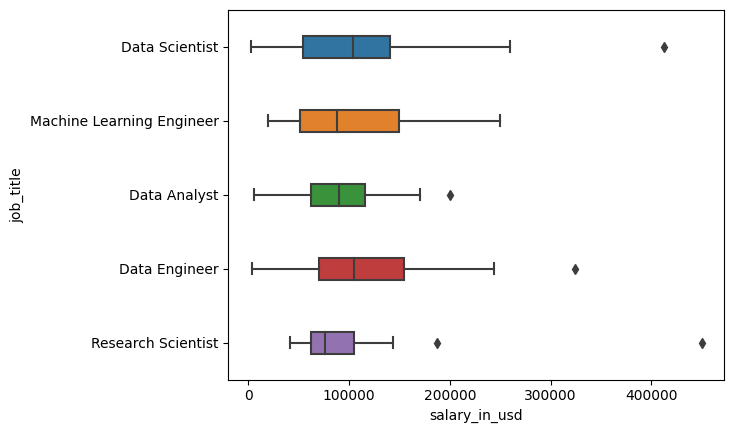

In [50]:
# Boxplot job en fonction du salaire

sns.boxplot(data=job_tite,y='job_title', x="salary_in_usd", width=0.3);
plt.show()

In [34]:
df

,ID,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,Company_location,employee_residence
0,0,2020,Intermediate,full time,Data Scientist,79833,0,L,Germany,Germany
1,30,2020,Intermediate,full time,Data Engineering Manager,59303,100,S,Germany,Germany
2,45,2020,Junior,part time,ML Engineer,15966,100,S,Germany,Germany
3,55,2020,Expert,full time,Principal Data Scientist,148261,100,M,Germany,Germany
4,65,2020,Junior,full time,Data Scientist,62726,50,S,Germany,Germany
...,...,...,...,...,...,...,...,...,...,...
602,501,2022,Intermediate,full time,Head of Data,32974,100,S,Estonia,Estonia
603,503,2022,Intermediate,full time,Machine Learning Engineer,87425,100,L,Australia,Australia
604,505,2022,Junior,full time,Data Scientist,86703,50,M,Australia,Australia
605,510,2022,Junior,full time,Computer Vision Software Engineer,150000,100,S,Australia,Australia


# EDA Selmane